In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median,variance,stdev
from scipy.stats import norm

In [2]:
## Histogram Intersection ##
def HI(a, b,N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    HI = 0
    for i in range(0, N-1):
        HI = HI + min(a_hist[i], b_hist[i])
    return HI

In [3]:
## KLD(正規分布) ##
def KLD(a, b):
    a_mu = np.mean(a)
    a_sigma = np.std(a)
    b_mu = np.mean(b)
    b_sigma = np.std(b)
    
    return np.log(b_sigma / b_sigma) + (a_sigma*a_sigma + (a_mu - b_mu)*(a_mu - b_mu))/(2*b_sigma*b_sigma) - 1/2

In [4]:
## JSD(正規分布) ##
def JSD(a, b):
    m = np.array([a+b])/2
    return 0.5 * (KLD(a, m) + KLD(b, m))

In [5]:
## L1 norm ##
def L1Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L1N = 0
    for i in range(0, N-1):
        L1N = L1N + abs(a_hist[i] - b_hist[i])
    return L1N

In [6]:
## L2 norm ##
def L2Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L2N = 0
    for i in range(0, N-1):
        L2N = L2N + (a_hist[i] - b_hist[i]) * (a_hist[i] - b_hist[i])
    return L2N

In [7]:
## data load ##

In [8]:
## IC ##

In [9]:
file_name = "IC/g/x.txt"
#file_name = "IC/gyro/x.txt"
X_IC = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_IC.append(float(fname[1]))

file.close()
print(len(X_IC))

3320


In [10]:
file_name = "IC/g/y.txt"
#file_name = "IC/gyro/y.txt"
Y_IC = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Y_IC.append(float(fname[1]))

file.close()
print(len(Y_IC))

3320


In [11]:
file_name = "IC/g/z.txt"
#file_name = "IC/gyro/z.txt"
Z_IC = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Z_IC.append(float(fname[1]))

file.close()
print(len(Z_IC))

3320


In [12]:
T_IC = np.arange(0, len(X_IC)*0.1, 0.1)
print(len(T_IC))

3320


In [13]:
## ICE ##

In [14]:
file_name = "ICE/x.txt"
X_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_ICE.append(float(fname[1]))

file.close()
print(len(X_ICE))

2785


In [15]:
file_name = "ICE/y.txt"
Y_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Y_ICE.append(float(fname[1]))

file.close()
print(len(Y_ICE))

2785


In [16]:
file_name = "ICE/z.txt"
Z_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Z_ICE.append(float(fname[1]))

file.close()
print(len(Z_ICE))

2785


In [17]:
T_ICE = np.arange(0, len(X_ICE)*0.1, 0.1)
print(len(T_ICE))

2785


In [18]:
## show ##

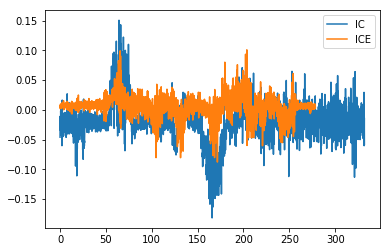

In [19]:
plt.plot(T_IC, X_IC,label="IC")
#plt.scatter(T_IC, X_IC,label="IC")
plt.plot(T_ICE, X_ICE,label="ICE")
#plt.scatter(T_ICE, X_ICE,label="ICE")
plt.legend()
plt.show()

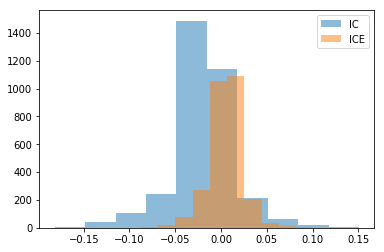

In [20]:
ave = mean(X_IC)
sigma = stdev(X_IC)
X_nd_IC = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_IC = norm.pdf(X_nd_IC,ave,sigma)
ave = mean(X_ICE)
sigma = stdev(X_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(X_IC,alpha=0.5,label="IC")
plt.hist(X_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

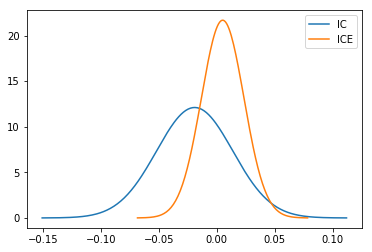

In [21]:
plt.plot(X_nd_IC,Y_nd_IC,label="IC")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [22]:
KLD(X_IC,X_ICE)

1.9675290519265625

In [23]:
JSD(X_IC,X_ICE)

1.4490181490924154

In [24]:
HI(X_IC,X_ICE)

132.73356273192363

In [25]:
L1Norm(X_IC,X_ICE)

336.04916309711604

In [26]:
L2Norm(X_IC,X_ICE)

5383.847518085512

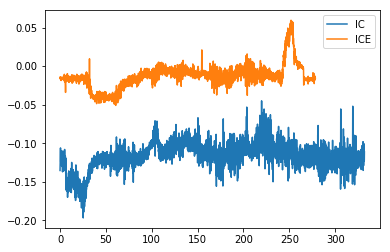

In [27]:
plt.plot(T_IC, Y_IC,label="IC")
#plt.scatter(T_IC, Y_IC,label="IC")
plt.plot(T_ICE, Y_ICE,label="ICE")
#plt.scatter(T_ICE, Y_ICE,label="ICE")
plt.legend()
plt.show()

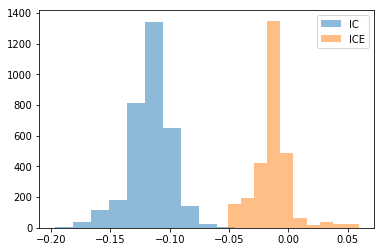

In [28]:
ave = mean(Y_IC)
sigma = stdev(Y_IC)
X_nd_IC = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_IC = norm.pdf(X_nd_IC,ave,sigma)
ave = mean(Y_ICE)
sigma = stdev(Y_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(Y_IC,alpha=0.5,label="IC")
plt.hist(Y_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

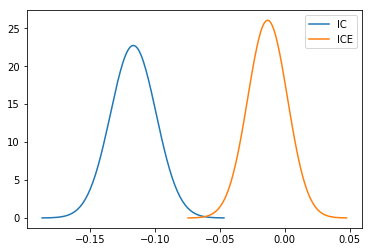

In [29]:
plt.plot(X_nd_IC,Y_nd_IC,label="IC")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [30]:
KLD(Y_IC,Y_ICE)

22.991030608439683

In [31]:
JSD(Y_IC,Y_ICE)

2.1344462615117026

In [32]:
HI(Y_IC,Y_ICE)

0.25753818446440685

In [33]:
L1Norm(Y_IC,Y_ICE)

779.1628994004949

In [34]:
L2Norm(Y_IC,Y_ICE)

18762.917711836435

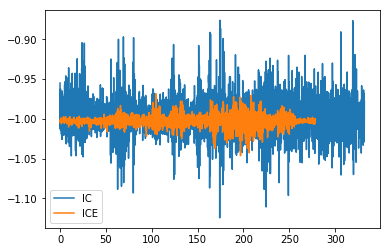

In [35]:
plt.plot(T_IC, Z_IC,label="IC")
#plt.scatter(T_IC, Z_IC,label="IC")
plt.plot(T_ICE, Z_ICE,label="ICE")
#plt.scatter(T_ICE, Z_ICE,label="ICE")
plt.legend()
plt.show()

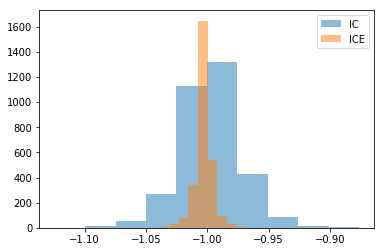

In [36]:
ave = mean(Z_IC)
sigma = stdev(Z_IC)
X_nd_IC = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_IC = norm.pdf(X_nd_IC,ave,sigma)
ave = mean(Z_ICE)
sigma = stdev(Z_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(Z_IC,alpha=0.5,label="IC")
plt.hist(Z_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

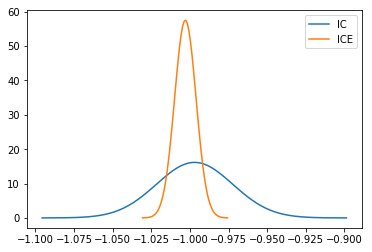

In [37]:
plt.plot(X_nd_IC,Y_nd_IC,label="IC")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [38]:
KLD(Z_IC,Z_ICE)

6.213382533794337

In [39]:
JSD(Z_IC,Z_ICE)

1383.398547012351

In [40]:
HI(Z_IC,Z_ICE)

186.4223187462117

In [41]:
L1Norm(Z_IC,Z_ICE)

432.51649065958117

In [42]:
L2Norm(Z_IC,Z_ICE)

13665.41344618633